In [ ]:
print("Hello World!")

#test comment

Hello World!


Research:
* How to import images into machine learning model 
* The images are different sizes, so learn to normalize them, somehow. 
* The images are different formats, png, jpeg, jpg how do we work with this.
* The covid dataset for images that have covid is only 125 images. Pretty small? Might affect accuracy alot.

Data augmentation:
* Random Crop and Resize (tf.data)

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_files
import tensorflow as tf
%matplotlib inline

import tensorflow as tf
import keras

import torchvision
import random
from PIL import Image
from torchvision import datasets
import torchvision.transforms as transforms
from torch.utils.data.sampler import SubsetRandomSampler

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [ ]:
#@title Connected data from drive

import os
from google.colab import drive

drive.mount('/content/drive', force_remount=True)

folder_path = '/content/drive/MyDrive/dataset'

os.chdir(folder_path)

if os.path.exists(folder_path):
    print('Folder is connected successfully!')
else:
    print('Folder is not connected.')

data_dir = os.listdir("/content/drive/MyDrive/dataset")
print(data_dir)

data_dir =  r'/content/drive/MyDrive/dataset'
 
data = load_files(data_dir)

Mounted at /content/drive
Folder is connected successfully!
['Covid-19', 'No_findings']


# New Section

In [ ]:
X = np.array(data['filenames'])
y = np.array(data['target'])
labels = np.array(data['target_names'])
 
print('Number of images : ', X.shape[0])
print('Number of label : ', y.shape[0])

Number of images :  623
Number of label :  623


In [ ]:
import cv2
import imghdr

image_exts = ['jpeg','jpg', 'png']

for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))

In [ ]:
data = tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/dataset')

Found 623 files belonging to 2 classes.


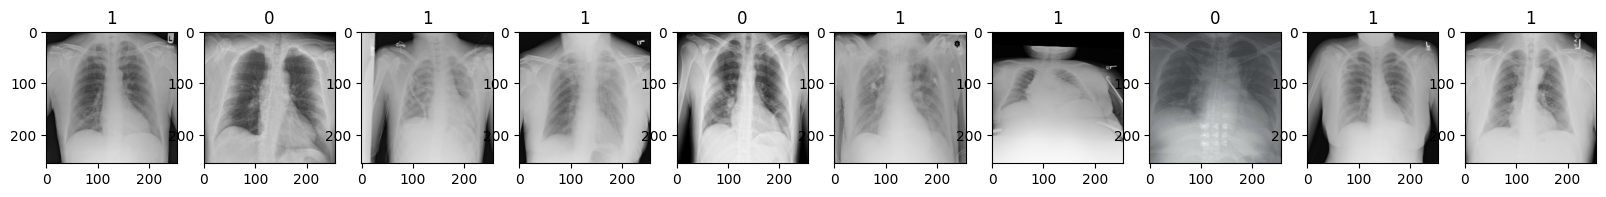

<Figure size 2000x900 with 0 Axes>

In [ ]:
data_iterator = data.as_numpy_iterator()

batch = data_iterator.next()

fig, ax = plt.subplots(ncols=10, figsize=(20,20))

for idx, img in enumerate(batch[0][:10]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])
fig = plt.figure(figsize=(20, 9))

In [ ]:
data = data.map(lambda x,y: (x/255, y))

data.as_numpy_iterator().next()

train_size = int(len(data)*.8)
val_size = int(len(data)*.1)
test_size = int(len(data)*.1)


train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [ ]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout


In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(Dropout(0.2))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(255, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])


In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 dropout_2 (Dropout)         (None, 60, 60, 16)       

In [ ]:
logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])


Epoch 1/20
16/16 [==============================] - 59s 3s/step - loss: 0.4964 - accuracy: 0.7539 - val_loss: 0.3610 - val_accuracy: 0.8750
Epoch 2/20
16/16 [==============================] - 66s 4s/step - loss: 0.2384 - accuracy: 0.9102 - val_loss: 0.1374 - val_accuracy: 0.9844
Epoch 3/20
16/16 [==============================] - 66s 4s/step - loss: 0.1230 - accuracy: 0.9609 - val_loss: 0.1071 - val_accuracy: 0.9375
Epoch 4/20
16/16 [==============================] - 56s 3s/step - loss: 0.1403 - accuracy: 0.9434 - val_loss: 0.1044 - val_accuracy: 0.9531
Epoch 5/20
16/16 [==============================] - 66s 4s/step - loss: 0.1058 - accuracy: 0.9512 - val_loss: 0.1120 - val_accuracy: 0.9688
Epoch 6/20
16/16 [==============================] - 57s 3s/step - loss: 0.0806 - accuracy: 0.9727 - val_loss: 0.0955 - val_accuracy: 0.9531
Epoch 7/20
16/16 [==============================] - 66s 4s/step - loss: 0.0674 - accuracy: 0.9727 - val_loss: 0.1829 - val_accuracy: 0.9219
Epoch 8/20
16/16 [==

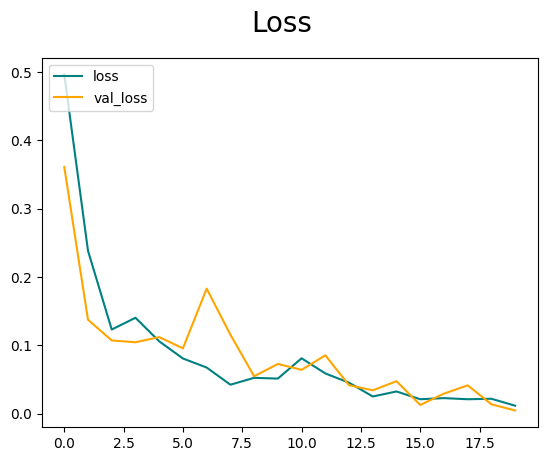

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

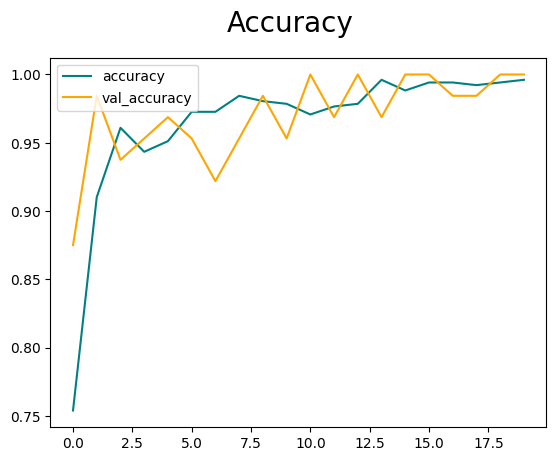

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [ ]:
from tensorflow.keras.metrics import Precision, Recall


pre = Precision()
re = Recall()
#f1 = F1Score()

for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    #f1.update_state(y, yhat)

print("Precision:", pre.result().numpy())
print("Recall:", re.result().numpy())
#print("F1-score:", f1.result().numpy())


1/1 [==============================] - 0s 257ms/step
Precision: 1.0
Recall: 1.0


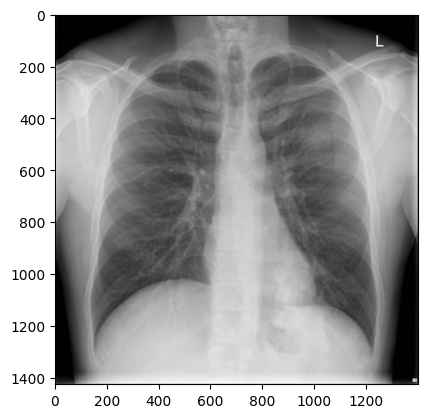

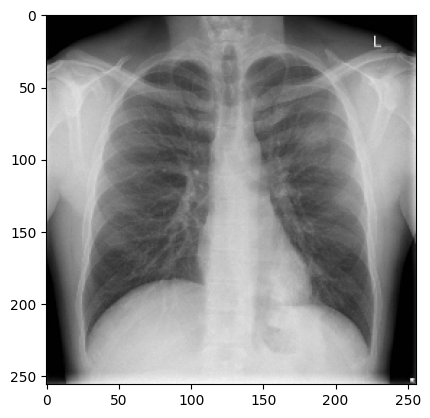

In [ ]:
img = cv2.imread("/content/sample_data/other/test2.jpeg")
plt.imshow(img)
plt.show()

resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
yhat = model.predict(np.expand_dims(resize/255, 0))

if yhat < 0.5: 
    print(f'Covid')
else:
    print(f'No Covid')

1/1 [==============================] - 0s 47ms/step
No Covid


In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model.save(os.path.join('models','imageclassifier.h5'))


In [ ]:
new_model = load_model('/content/drive/MyDrive/dataset/models/imageclassifier.h5')


In [ ]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 127ms/step


array([[0.9788667]], dtype=float32)